#### Importing the libraries :-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                                  
import glob
import os

import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Dense,Dropout,Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")
print("Module and Packages imported successfully.....!")

#### Loading reading :-

In [26]:
train_dir = "C:/Users/Ganpati Kumar Roy/Desktop/5 Ocular Disease/Training/"
val_dir = "C:/Users/Ganpati Kumar Roy/Desktop/5 Ocular Disease/Validation/"

#### Data reading :-

In [27]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [28]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples=get_files(val_dir) 
print("Classes are :- ", num_classes)
print("Total train images :-", train_samples)
print("Total validation images :-", val_samples)

Classes are :-  5
Total train images :- 5663
Total validation images :- 1397


#### Data preprocessing :-

In [29]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

In [30]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
validation_generator = validation_datagen.flow_from_directory(
                                                    val_dir, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size) 

Found 5663 images belonging to 5 classes.
Found 1397 images belonging to 5 classes.


In [31]:
train_generator.class_indices

{'Blindness': 0,
 'Diabetic Retinopathy': 1,
 'Glaucoma': 2,
 'Normal': 3,
 'Other Disease-Blindness': 4}

#### CNN 3 Layer Parameter Building

In [32]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)            

In [33]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,
                          epochs=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples // batch_size,
                          verbose=1)

Epoch 1/10
176/176 [==============================] - 1975s 11s/step - loss: 0.9929 - accuracy: 0.6050 - val_loss: 0.7912 - val_accuracy: 0.7013
Epoch 2/10
176/176 [==============================] - 1171s 7s/step - loss: 0.5820 - accuracy: 0.7849 - val_loss: 0.4946 - val_accuracy: 0.8161
Epoch 3/10
176/176 [==============================] - 1108s 6s/step - loss: 0.4551 - accuracy: 0.8327 - val_loss: 0.4691 - val_accuracy: 0.8379
Epoch 4/10
176/176 [==============================] - 1098s 6s/step - loss: 0.3534 - accuracy: 0.8762 - val_loss: 0.3632 - val_accuracy: 0.8612
Epoch 5/10
176/176 [==============================] - 1196s 7s/step - loss: 0.3014 - accuracy: 0.8899 - val_loss: 0.3265 - val_accuracy: 0.8779
Epoch 6/10
176/176 [==============================] - 1205s 7s/step - loss: 0.2660 - accuracy: 0.9041 - val_loss: 0.3007 - val_accuracy: 0.8735
Epoch 7/10
176/176 [==============================] - 1142s 6s/step - loss: 0.2523 - accuracy: 0.9061 - val_loss: 0.2886 - val_accuracy

#### Model Saving :-

In [34]:
from tensorflow.keras.models import load_model
model.save('5-O-D_CNN.h5')

#### Accuracy graph :-

In [35]:
train.history

{'loss': [0.9929320216178894,
  0.5820430517196655,
  0.4550572633743286,
  0.353367418050766,
  0.30143868923187256,
  0.2660229504108429,
  0.2523314654827118,
  0.24711813032627106,
  0.22250433266162872,
  0.20116229355335236],
 'accuracy': [0.6050435304641724,
  0.7849404811859131,
  0.8327117562294006,
  0.8762209415435791,
  0.8898952007293701,
  0.9041022658348083,
  0.906055748462677,
  0.9076540470123291,
  0.9149351716041565,
  0.9250577092170715],
 'val_loss': [0.7911989092826843,
  0.49460268020629883,
  0.46905770897865295,
  0.3631620407104492,
  0.32651767134666443,
  0.3007184863090515,
  0.2885534167289734,
  0.3134392201900482,
  0.2721359133720398,
  0.2428753823041916],
 'val_accuracy': [0.7013081312179565,
  0.8161337375640869,
  0.8379360437393188,
  0.8611918687820435,
  0.8779069781303406,
  0.8735465407371521,
  0.8902616500854492,
  0.8779069781303406,
  0.8808139562606812,
  0.898982584476471]}

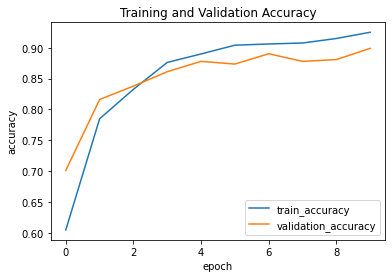

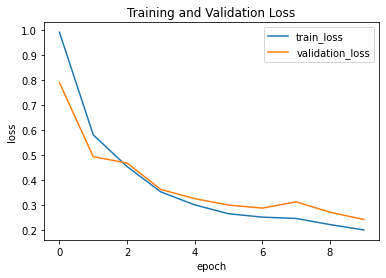

In [36]:
def plot_accuracy(train,title):
    plt.title(title)
    plt.plot(train.history['accuracy']) 
    plt.plot(train.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(train,title):
    plt.title(title)
    plt.plot(train.history['loss'])
    plt.plot(train.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

    
plot_accuracy(train,'Training and Validation Accuracy')
plot_loss(train,'Training and Validation Loss')

#### Confusion Matrix :-

##### Training :-

In [37]:
train_generator.reset()
predictions = model.predict_generator(generator = train_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = train_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.


In [38]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = train_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [43]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("black")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

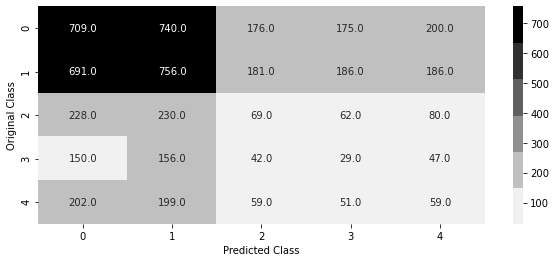

In [44]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 

##### Validation :-

In [45]:
validation_generator.reset()
predictions = model.predict_generator(generator = validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

In [46]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [47]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("black")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

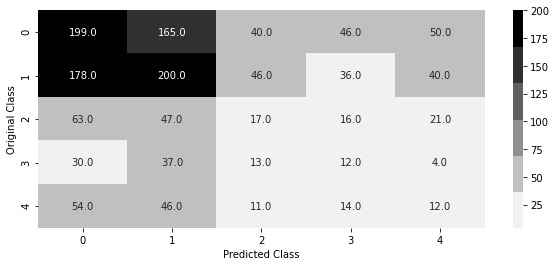

In [48]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 